# 4.4.5 Challenge: Build your own NLP model

For this challenge, you will need to choose a corpus of data from nltk or another source that includes categories you can predict and create an analysis pipeline that includes the following steps:

1. Data cleaning / processing / language parsing
2. Create features using two different NLP methods: For example, BoW vs tf-idf.
3. Use the features to fit supervised learning models for each feature set to predict the category outcomes.
4. Assess your models using cross-validation and determine whether one model performed better.
5. Pick one of the models and try to increase accuracy by at least 5 percentage points.


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# NLP 
import spacy
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

### Corpus Processing - PLOS Abstracts
Using the PLOS (science publisher) API, I downloaded the abstracts for the following searches: physics, stars, black holes, strings, hawking, galileo.

In [2]:
response1 = requests.get(r'http://api.plos.org/search?q=title:"physics"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response2 = requests.get(r'http://api.plos.org/search?q=title:"stars"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response3 = requests.get(r'http://api.plos.org/search?q=title:"black holes"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response4 = requests.get(r'http://api.plos.org/search?q=title:"strings"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response5 = requests.get(r'http://api.plos.org/search?q=title:"mass"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response6 = requests.get(r'http://api.plos.org/search?q=title:"hawking"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response7 = requests.get(r'http://api.plos.org/search?q=title:"galileo"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')

Using JSON data into usable data

In [3]:
physics_raw = response1.json()
stars_raw = response2.json()
black_raw = response3.json()
strings_raw = response4.json()
mass_raw = response5.json()
astrophysics_raw = response6.json()
galileo_raw = response7.json()

Extracting only the abstracts of each article into one string. 

In [4]:
physics = ''
for article in physics_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    physics = physics + art

physics[0:200]

"'''Background: Physical function is a crucial factor in the prevention and treatment of health conditions in older adults and is usually measured objectively with physical performance tests and/or phy"

In [5]:
stars = ''
for article in stars_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    stars = stars + art

stars[0:200]

'"\\n        The founding director of Singapore\'s Institute of Molecular and Cell Biology illustrates the rise of science in Asia.\\n      "\'\\nDisease outbreaks can have substantial impacts on wild popul'

In [6]:
black = ''
for article in black_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    black = black + art

black[0:200]

"'\\nIt has been suggested that innovations occur mainly by combination: the more inventions accumulate, the higher the probability that new inventions are obtained from previous designs. Additionally, "

In [7]:
strings = ''
for article in strings_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    strings = strings + art

strings[0:200]

"'\\nElectric guitar playing is ubiquitous in practically all modern music genres. In the hands of an experienced player, electric guitars can sound as expressive and distinct as a human voice. Unlike o"

In [8]:
mass = ''
for article in mass_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    mass = black + mass

mass[0:200]

"'\\nIt has been suggested that innovations occur mainly by combination: the more inventions accumulate, the higher the probability that new inventions are obtained from previous designs. Additionally, "

In [9]:
astrophysics = ''
for article in astrophysics_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    astrophysics = astrophysics + art

astrophysics[0:200]

"'\\nSwainson’s hawks (Buteo swainsoni) are long-distance migratory raptors that nest primarily in isolated trees located in areas of high grassland density. In recent years, anthropogenic conversion of"

In [10]:
galileo = ''
for article in galileo_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    galileo = galileo + art

galileo[0:200]

'"Background: Transposable elements (TEs) are responsible for the generation of chromosomal inversions in several groups of organisms. However, in Drosophila and other Dipterans, where inversions are a'

### Text Cleaning

In [11]:
def text_cleaner(text):
    text = re.sub(r'--', ' ', text)
    text = re.sub(r'[\']', '', text)
    text = re.sub(r'[\\]', '', text)
    text = re.sub(r'\d', '', text)
    return text

In [12]:
physics_clean = text_cleaner(physics)
stars_clean = text_cleaner(stars)
black_clean = text_cleaner(black)
strings_clean = text_cleaner(strings)
mass_clean = text_cleaner(mass)
astrophysics_clean = text_cleaner(astrophysics)
galileo_clean = text_cleaner(galileo)

In [13]:
len(physics_clean)

14431

### Language Parsing with Spacy

In [14]:
nlp = spacy.load('en')

physics_doc = nlp(physics_clean)
stars_doc = nlp(stars_clean)
black_doc = nlp(black_clean)
strings_doc = nlp(strings_clean)
mass_doc = nlp(mass_clean)
astrophysics_doc = nlp(astrophysics_clean)
galileo_doc = nlp(galileo_clean)

Splitting each topic into individual sentences.

In [15]:
physics_sents = [[sent, 'Physics'] for sent in physics_doc.sents]
stars_sents = [[sent, 'Stars'] for sent in stars_doc.sents]
black_sents = [[sent, 'Black Holes'] for sent in black_doc.sents]
strings_sents = [[sent, 'Strings'] for sent in strings_doc.sents]
mass_sents = [[sent, 'Mass'] for sent in mass_doc.sents]
astrophysics_sents = [[sent, 'Astrophysics'] for sent in astrophysics_doc.sents]
galileo_sents = [[sent, 'Galileo'] for sent in galileo_doc.sents]

sentences = pd.DataFrame(physics_sents + stars_sents + black_sents + strings_sents + mass_sents + astrophysics_sents + galileo_sents)
sentences.head()
print(len(sentences))

898


### Creating BOW Features
Defining functions to identify most common words and the create features from those words in the text.

In [16]:
def bag_of_words(text):
    allwords = [token.lemma_
               for token in text
               if not token.is_punct
               and not token.is_stop]
    return [item[0] for item in Counter(allwords).most_common(2000)]

def bow_features(sentences, common_words):
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:,common_words] = 0
    
    for i, sentence in enumerate(df['text_sentence']):
        words = [token.lemma_ 
                for token in sentence
                if (
                    not token.is_punct
                    and not token.is_stop
                    and token.lemma_ in common_words
                )]
        for word in words:
            df.loc[i, word] += 1
        if i%100 == 0:
            print('Processing row {}'.format(i))
    return df

In [17]:
physics = response1.json()
stars = response2.json()
black = response3.json()
strings = response4.json()
mass = response5.json()
astrophysics = response6.json()
galileo = response7.json()

Finding common words

In [18]:
physics_words = bag_of_words(physics_doc)
stars_words = bag_of_words(stars_doc)
black_words = bag_of_words(black_doc)
strings_words = bag_of_words(strings_doc)
mass_words = bag_of_words(mass_doc)
astrophysics_words = bag_of_words(astrophysics_doc)
galileo_words = bag_of_words(galileo_doc)

common_words = set(physics_words + stars_words + black_words + strings_words + mass_words + astrophysics_words + galileo_words)

Creating features.

In [19]:
word_counts = bow_features(sentences, common_words)
word_counts.head()

Processing row 0
Processing row 100
Processing row 200
Processing row 300
Processing row 400
Processing row 500
Processing row 600
Processing row 700
Processing row 800


,novel,recruit,microscopy,normal,kidney,habituation,acoustic,instant,conjugate,strategy,...,feature,foraging,laboratory,edema,sensor,decrease,demographic,incidence,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Background, :, Physical, function, is, a, cru...",Physics
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Objective, :)",Physics
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(To, examine, whether, ), physical, performanc...",Physics
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Design, :, Cross, -, sectional, study, to, ex...",Physics
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Methods, :)",Physics


In [20]:
word_counts.shape

(898, 2263)

### Creating tf-idf features
Converting sentences into numeric vectors.

Creating list

In [21]:
abstract_list = []
for topic in [physics_raw, stars_raw, black_raw, strings_raw, mass_raw, astrophysics_raw, galileo_raw]:
    for article in topic['response']['docs']:
        abstract_list = abstract_list + article['abstract']

Vectorizing

In [22]:
from sklearn.model_selection import train_test_split

X = abstract_list

X_train, X_test = train_test_split(X, test_size=0.4, random_state=42)

vectorizer = TfidfVectorizer(encoding='ASCII',
                             max_df=0.7, # drop words that occur in more than half the paragraphs
                             min_df=4, # only use words that appear at least four times
                             stop_words='english', 
                             lowercase=False, #convert everything to lower case
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

#Applying the vectorizer
abstract_tfidf=vectorizer.fit_transform(abstract_list)
print("Number of features: %d" % abstract_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(abstract_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 260
Original sentence: 
In big data area a significant challenge about string similarity join is to find all similar pairs more efficiently. In this paper, we propose a parallel processing framework for efficient string similarity join. First, the input is split into some disjoint small subsets according to the joint frequency distribution and the interval distribution of strings. Then the filter-verification strategy is adopted in the computation of string similarity for each subset so that the number of candidate pairs is reduced before an effective pruning strategy is used to improve the performance. Finally, the operation of string join is executed in parallel. Para-Join algorithm based on the multi-threading technique is proposed to implement the framework in a multi-core system while Pada-Join algorithm based on Spark platform is proposed to implement the framework in a cluster system. We prove that Para-Join and Pada-Join cannot only avoid reduplicate computa

Reducing data and finding the explained variance ratio. 

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 260 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])


Percent variance captured by all components: 100.0
Component 0:
Background: Great cormorants (Phalacrocorax carbo L.) show the highest known foraging yield for a marine predator and they are often perceived to be in conflict with human economic interests. They are generally regarded as visually-guided, pursuit-dive foragers, so it would be expected that cormorants have excellent vision much like aerial predators, such as hawks which detect and pursue prey from a distance. Indeed cormorant eyes appear to show some specific adaptations to the amphibious life style. They are reported to have a highly pliable lens and powerful intraocular muscles which are thought to accommodate for the loss of corneal refractive power that accompanies immersion and ensures a well focussed image on the retina. However, nothing is known of the visual performance of these birds and how this might influence their prey capture technique. Methodology/Principal Findings: We measured the aquatic visual acuity of 

There is clearly overfitting, and variance explained is 100 %.

Similarity between paragraphs:

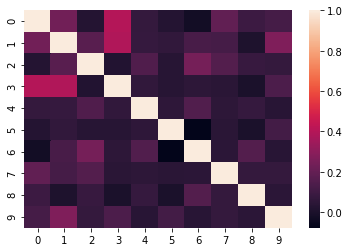

Key:
0 Background: Transposable elements (TEs) are responsible for the generation of chromosomal inversions in several groups of organisms. However, in Drosophila and other Dipterans, where inversions are abundant both as intraspecific polymorphisms and interspecific fixed differences, the evidence for a role of TEs is scarce. Previous work revealed that the transposon Galileo was involved in the generation of two polymorphic inversions of Drosophila buzzatii. Methodology/Principal Findings: To assess the impact of TEs in Drosophila chromosomal evolution and shed light on the mechanism involved, we isolated and sequenced the two breakpoints of another widespread polymorphic inversion from D. buzzatii, 2z3. In the non inverted chromosome, the 2z3 distal breakpoint was located between genes CG2046 and CG10326 whereas the proximal breakpoint lies between two novel genes that we have named Dlh and Mdp. In the inverted chromosome, the analysis of the breakpoint sequences revealed relatively

In [24]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

Clearly there is a low similarity.

### Supervised Learning Models to Predict Outcomes
Using BOW features we will predict outcomes using Radom Forest Classifier, Logistic Regression, and Gradient Boosting Classifier.

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
Y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.931226765799

Test set score: 0.769444444444


In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
train = lr.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

(538, 2261) (538,)
Training set score: 0.934944237918

Test set score: 0.852777777778


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
train = clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

Training set score: 0.931226765799

Test set score: 0.788888888889


Logistic regression had the highest score for the test set.

#### Optimizing Logistic Regression Model

Reducing number of common words:

In [28]:
def bag_of_words2(text):
    allwords = [token.lemma_
               for token in text
               if not token.is_punct
               and not token.is_stop]
    return [item[0] for item in Counter(allwords).most_common(1000)]
#word_counts2 = bow_features(sentences2, common_words2)
#word_counts2.head()

Adding entries:

In [29]:
response1b = requests.get(r'http://api.plos.org/search?q=title:"physics"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response2b = requests.get(r'http://api.plos.org/search?q=title:"stars"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response3b = requests.get(r'http://api.plos.org/search?q=title:"black holes"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response4b = requests.get(r'http://api.plos.org/search?q=title:"strings"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response5b = requests.get(r'http://api.plos.org/search?q=title:"mass"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response6b = requests.get(r'http://api.plos.org/search?q=title:"hawking"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response7b = requests.get(r'http://api.plos.org/search?q=title:"galileo"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')

Creating usable data:

In [30]:
physics_raw2 = response1.json()
stars_raw2 = response2.json()
black_raw2 = response3.json()
strings_raw2 = response4.json()
mass_raw2 = response5.json()
astrophysics_raw2 = response6.json()
galileo_raw2 = response7.json()

In [31]:
physics = ''
for article in physics_raw2['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    physics = physics + art

physics[0:200]

"'''Background: Physical function is a crucial factor in the prevention and treatment of health conditions in older adults and is usually measured objectively with physical performance tests and/or phy"

In [32]:
stars = ''
for article in stars_raw2['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    stars = stars + art

stars[0:200]

'"\\n        The founding director of Singapore\'s Institute of Molecular and Cell Biology illustrates the rise of science in Asia.\\n      "\'\\nDisease outbreaks can have substantial impacts on wild popul'

In [33]:
black = ''
for article in black_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    black = black + art

black[0:200]

"'\\nIt has been suggested that innovations occur mainly by combination: the more inventions accumulate, the higher the probability that new inventions are obtained from previous designs. Additionally, "

In [34]:
strings = ''
for article in strings_raw2['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    strings = strings + art

strings[0:200]

"'\\nElectric guitar playing is ubiquitous in practically all modern music genres. In the hands of an experienced player, electric guitars can sound as expressive and distinct as a human voice. Unlike o"

In [35]:
mass = ''
for article in mass_raw2['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    mass = black + mass

mass[0:200]

"'\\nIt has been suggested that innovations occur mainly by combination: the more inventions accumulate, the higher the probability that new inventions are obtained from previous designs. Additionally, "

In [36]:
astrophysics = ''
for article in astrophysics_raw2['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    astrophysics = astrophysics + art

astrophysics[0:200]

"'\\nSwainson’s hawks (Buteo swainsoni) are long-distance migratory raptors that nest primarily in isolated trees located in areas of high grassland density. In recent years, anthropogenic conversion of"

In [37]:
galileo = ''
for article in galileo_raw2['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    galileo = galileo + art

galileo[0:200]

'"Background: Transposable elements (TEs) are responsible for the generation of chromosomal inversions in several groups of organisms. However, in Drosophila and other Dipterans, where inversions are a'

In [38]:
physics_clean2 = text_cleaner(physics)
stars_clean2 = text_cleaner(stars)
black_clean2 = text_cleaner(black)
strings_clean2 = text_cleaner(strings)
mass_clean2 = text_cleaner(mass)
astrophysics_clean2 = text_cleaner(astrophysics)
galileo_clean2 = text_cleaner(galileo)

In [39]:
physics_doc2 = nlp(physics_clean)
stars_doc2 = nlp(stars_clean)
black_doc2 = nlp(black_clean)
strings_doc2 = nlp(strings_clean)
mass_doc2 = nlp(mass_clean)
astrophysics_doc2 = nlp(astrophysics_clean)
galileo_doc2 = nlp(galileo_clean)

Splitting topics

In [40]:
physics_sents2 = [[sent, 'Physics'] for sent in physics_doc2.sents]
stars_sents2 = [[sent, 'Stars'] for sent in stars_doc2.sents]
black_sents2 = [[sent, 'Black Holes'] for sent in black_doc2.sents]
strings_sents2 = [[sent, 'Strings'] for sent in strings_doc2.sents]
mass_sents2 = [[sent, 'Mass'] for sent in mass_doc2.sents]
astrophysics_sents2 = [[sent, 'Astrophysics'] for sent in astrophysics_doc2.sents]
galileo_sents2 = [[sent, 'Galileo'] for sent in galileo_doc2.sents]

sentences2 = pd.DataFrame(physics_sents2 + stars_sents2 + black_sents2 + strings_sents2 + mass_sents2 + astrophysics_sents2 + galileo_sents2)
sentences2.head()
print(len(sentences2))

898


Identifying common words.

In [41]:
physics_words2 = bag_of_words(physics_doc2)
stars_words2 = bag_of_words(stars_doc2)
black_words2 = bag_of_words(black_doc2)
strings_words2 = bag_of_words(strings_doc2)
mass_words2 = bag_of_words(mass_doc2)
astrophysics_words2 = bag_of_words(astrophysics_doc2)
galileo_words2 = bag_of_words(galileo_doc2)

common_words2 = set(physics_words2 + stars_words2 + black_words2 + strings_words2 + mass_words2 + astrophysics_words2 + galileo_words2)

Creating features:

In [42]:
word_counts2 = bow_features(sentences2, common_words2)
word_counts2.head()

Processing row 0
Processing row 100
Processing row 200
Processing row 300
Processing row 400
Processing row 500
Processing row 600
Processing row 700
Processing row 800


,novel,recruit,microscopy,normal,kidney,habituation,acoustic,instant,conjugate,strategy,...,feature,foraging,laboratory,edema,sensor,decrease,demographic,incidence,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Background, :, Physical, function, is, a, cru...",Physics
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Objective, :)",Physics
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(To, examine, whether, ), physical, performanc...",Physics
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Design, :, Cross, -, sectional, study, to, ex...",Physics
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Methods, :)",Physics


Sentence length as a feature:

In [43]:
word_counts2['sent_length'] = word_counts2.text_sentence.map(lambda x: len(x)) 

In [44]:
Y2 = word_counts2['text_source']
X2 = np.array(word_counts2.drop(['text_sentence','text_source'], 1))

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, 
                                                    Y2,
                                                    test_size=0.4,
                                                    random_state=0)

In [45]:
lr2 = LogisticRegression()
train = lr2.fit(X_train2, y_train2)
print(X_train2.shape, y_train2.shape)
print('Training set score:', lr2.score(X_train2, y_train2))
print('\nTest set score:', lr2.score(X_test2, y_test2))

(538, 2262) (538,)
Training set score: 0.934944237918

Test set score: 0.852777777778


This didn't help much.

In [46]:
abstract_list2 = []
for topic in [physics_raw2, stars_raw2, black_raw2, strings_raw2, mass_raw2, astrophysics_raw2, galileo_raw2]:
    for article in topic['response']['docs']:
        abstract_list2 = abstract_list2 + article['abstract']

Applying vectorizer:

In [47]:
from sklearn.model_selection import train_test_split

X2 = abstract_list2

X_train2, X_test2 = train_test_split(X2, test_size=0.4, random_state=42)

vectorizer = TfidfVectorizer(encoding='ASCII',
                             max_df=0.7, # drop words that occur in more than half the paragraphs
                             min_df=4, # only use words that appear at least four times
                             stop_words='english', 
                             lowercase=False, #convert everything to lower case
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

#Applying the vectorizer
abstract_tfidf2=vectorizer.fit_transform(abstract_list2)
print("Number of features: %d" % abstract_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf2, X_test_tfidf2 = train_test_split(abstract_tfidf2, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr2 = X_train_tfidf2.tocsr()

#number of paragraphs
n = X_train_tfidf_csr2.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara2 = [{} for _ in range(0,n)]
#List of features
terms2 = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr2.nonzero()):
    tfidf_bypara2[i][terms2[j]] = X_train_tfidf_csr2[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train2[5])
print('Tf_idf vector:', tfidf_bypara2[5])

Number of features: 260
Original sentence: 
In big data area a significant challenge about string similarity join is to find all similar pairs more efficiently. In this paper, we propose a parallel processing framework for efficient string similarity join. First, the input is split into some disjoint small subsets according to the joint frequency distribution and the interval distribution of strings. Then the filter-verification strategy is adopted in the computation of string similarity for each subset so that the number of candidate pairs is reduced before an effective pruning strategy is used to improve the performance. Finally, the operation of string join is executed in parallel. Para-Join algorithm based on the multi-threading technique is proposed to implement the framework in a multi-core system while Pada-Join algorithm based on Spark platform is proposed to implement the framework in a cluster system. We prove that Para-Join and Pada-Join cannot only avoid reduplicate computa

In [48]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd2= TruncatedSVD(130)
lsa2 = make_pipeline(svd2, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa2 = lsa2.fit_transform(X_train_tfidf2)

variance_explained2=svd2.explained_variance_ratio_
total_variance2 = variance_explained2.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component2=pd.DataFrame(X_train_lsa2,index=X_train2)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component2.loc[:,i].sort_values(ascending=False)[0:10])


Percent variance captured by all components: 100.0
Component 0:
Background: Great cormorants (Phalacrocorax carbo L.) show the highest known foraging yield for a marine predator and they are often perceived to be in conflict with human economic interests. They are generally regarded as visually-guided, pursuit-dive foragers, so it would be expected that cormorants have excellent vision much like aerial predators, such as hawks which detect and pursue prey from a distance. Indeed cormorant eyes appear to show some specific adaptations to the amphibious life style. They are reported to have a highly pliable lens and powerful intraocular muscles which are thought to accommodate for the loss of corneal refractive power that accompanies immersion and ensures a well focussed image on the retina. However, nothing is known of the visual performance of these birds and how this might influence their prey capture technique. Methodology/Principal Findings: We measured the aquatic visual acuity of 

Still there is overfitting, and variance explained is 100 %. 

Probably the problem is due to too many words in each paragraph. Probably we should approach this in a different way.